<a href="https://colab.research.google.com/github/Suyasha-github/PMOD-Vehicle-Insurance/blob/main/Cross_Sell_Prediction_Vehicle_Insurance_PMOD_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
Ab = pd.read_csv("https://github.com/Suyasha-github/PMOD-Vehicle-Insurance/raw/main/Cross%20Sell%20prediction_Vehicle%20Insurance.csv")

In [6]:
Ab

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium_(Health insurance),Policy_Sales_Channel,Vintage,Interested_in_vehicle_insurance_(response)
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


**Logistic Regression**

In [7]:
Ab.isna().sum()

id                                            0
Gender                                        0
Age                                           0
Driving_License                               0
Region_Code                                   0
Previously_Insured                            0
Vehicle_Age                                   0
Vehicle_Damage                                0
Annual_Premium_(Health insurance)             0
Policy_Sales_Channel                          0
Vintage                                       0
Interested_in_vehicle_insurance_(response)    0
dtype: int64

In [8]:
Ab.replace("No", 0, inplace= True)
Ab.replace("Yes", 1, inplace= True)
Ab.replace("Male", 1, inplace= True)
Ab.replace("Female", 0, inplace= True)

In [9]:
Ab.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium_(Health insurance),Policy_Sales_Channel,Vintage,Interested_in_vehicle_insurance_(response)
0,1,1,44,1,28,0,> 2 Years,1,40454,26,217,1
1,2,1,76,1,3,0,1-2 Year,0,33536,26,183,0
2,3,1,47,1,28,0,> 2 Years,1,38294,26,27,1
3,4,1,21,1,11,1,< 1 Year,0,28619,152,203,0
4,5,0,29,1,41,1,< 1 Year,0,27496,152,39,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = Ab.drop(axis = 1, columns = ["id",	"Driving_License", "Region_Code", "Vehicle_Age","Interested_in_vehicle_insurance_(response)"])
Y = Ab[['Interested_in_vehicle_insurance_(response)']]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 123)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn import metrics

In [15]:
logreg = LogisticRegression()
logmodel = logreg.fit(X_train,Y_train)
Y_preds_log = logmodel.predict(X_test)
print("Accuracy of the Log Model: ", metrics.accuracy_score(Y_test, Y_preds_log))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of the Log Model:  0.8733086685383923


**Decision Tree Classifier**

In [16]:
import seaborn as sns

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtreeclf = DecisionTreeClassifier()

In [19]:
dtmodel = dtreeclf.fit(X_train,Y_train)

In [20]:
Y_preds = dtmodel.predict(X_test)

**Accuracy Scores**

In [21]:
metrics.accuracy_score(Y_test,Y_preds)

0.8238478829384343

In [22]:
metrics.roc_auc_score(Y_test,Y_preds)

0.6026217105391182

In [23]:
metrics.confusion_matrix(Y_test,Y_preds)

array([[89870, 10519],
       [ 9621,  4323]])

**Graphs**

In [24]:
dtmodel.feature_importances_

array([0.02733353, 0.14583899, 0.01237577, 0.12737587, 0.32471326,
       0.04776256, 0.31460002])

In [25]:
feat_imp = pd.DataFrame(dtmodel.feature_importances_,columns=["Variable_Importance"])
feat_imp.head()

,Variable_Importance
0,0.027334
1,0.145839
2,0.012376
3,0.127376
4,0.324713


In [26]:
feat_imp["feature"] = X_train.columns 
feat_imp.head()

,Variable_Importance,feature
0,0.027334,Gender
1,0.145839,Age
2,0.012376,Previously_Insured
3,0.127376,Vehicle_Damage
4,0.324713,Annual_Premium_(Health insurance)


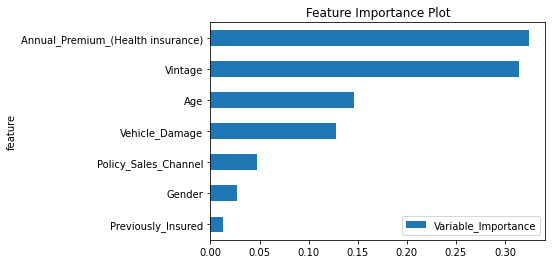

In [27]:
feat_imp.sort_values(by='Variable_Importance', inplace=True)
feat_imp.set_index('feature', inplace=True) 
feat_imp.plot.barh(title="Feature Importance Plot")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


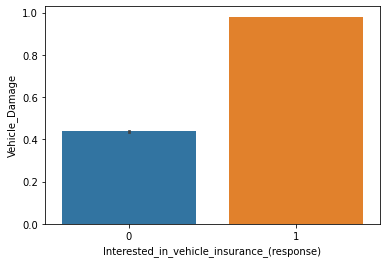

In [46]:
sns.barplot(Ab["Interested_in_vehicle_insurance_(response)"], Ab["Vehicle_Damage"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


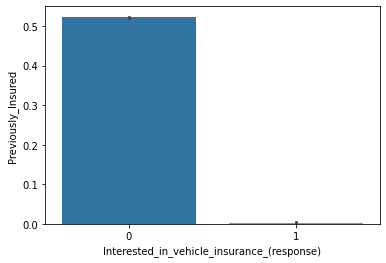

In [47]:
sns.barplot(Ab["Interested_in_vehicle_insurance_(response)"], Ab["Previously_Insured"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


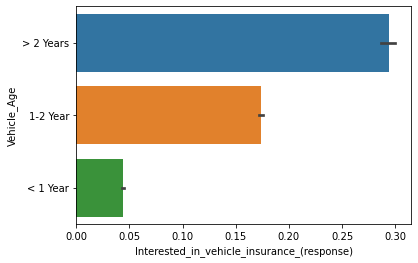

In [48]:
sns.barplot(Ab["Interested_in_vehicle_insurance_(response)"], Ab["Vehicle_Age"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


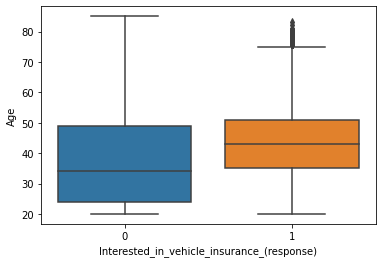

In [28]:
sns.boxplot(Ab["Interested_in_vehicle_insurance_(response)"], Ab["Age"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


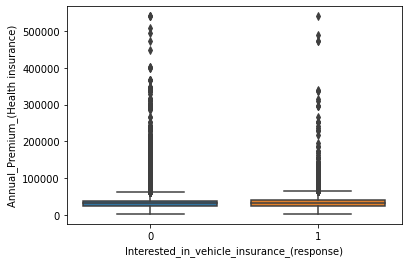

In [29]:
sns.boxplot(Ab["Interested_in_vehicle_insurance_(response)"], Ab["Annual_Premium_(Health insurance)"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


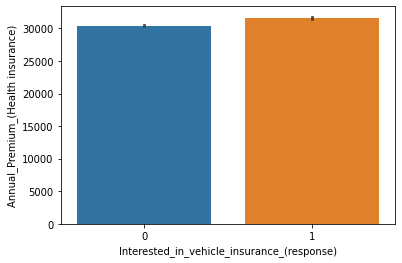

In [30]:
sns.barplot(Ab["Interested_in_vehicle_insurance_(response)"], Ab["Annual_Premium_(Health insurance)"])

In [31]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import pandas as pd

In [32]:
# setting up K folds for cross validation
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=123)
dtreg = tree.DecisionTreeClassifier(max_depth=4)

In [33]:
score = cross_val_score(dtreg, X, Y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
score

array([-0.34977136, -0.35139922, -0.34885118, -0.35033355, -0.35009234])

In [34]:
# average RMSE from the 5 folds CV
score.mean()

-0.35008953030408013

In [35]:
y_preds = cross_val_predict(dtreg, X,Y, cv = crossvalidation)

Decision Tree

In [36]:
X1 = Ab[["Previously_Insured", "Annual_Premium_(Health insurance)"]][0:100]
Y1 = Ab[['Interested_in_vehicle_insurance_(response)']][0:100]
X1

,Previously_Insured,Annual_Premium_(Health insurance)
0,0,40454
1,0,33536
2,0,38294
3,1,28619
4,1,27496
...,...,...
95,0,26689
96,0,46995
97,0,41892
98,0,34274


In [41]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1,Y1,test_size = 0.3, random_state = 123)

In [37]:
pip install dtreeplt

     |████████████████████████████████| 788kB 5.2MB/s 
     |████████████████████████████████| 358kB 9.3MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.9 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from dtreeplt import dtreeplt
from sklearn import metrics
from sklearn import tree
import pydotplus
from dtreeplt import dtreeplt
from IPython.display import Image,display

In [43]:
dt=tree.DecisionTreeClassifier()
dt=dt.fit(X1_train,Y_train)

In [44]:
X1.columns.values

array(['Previously_Insured', 'Annual_Premium_(Health insurance)'],
      dtype=object)

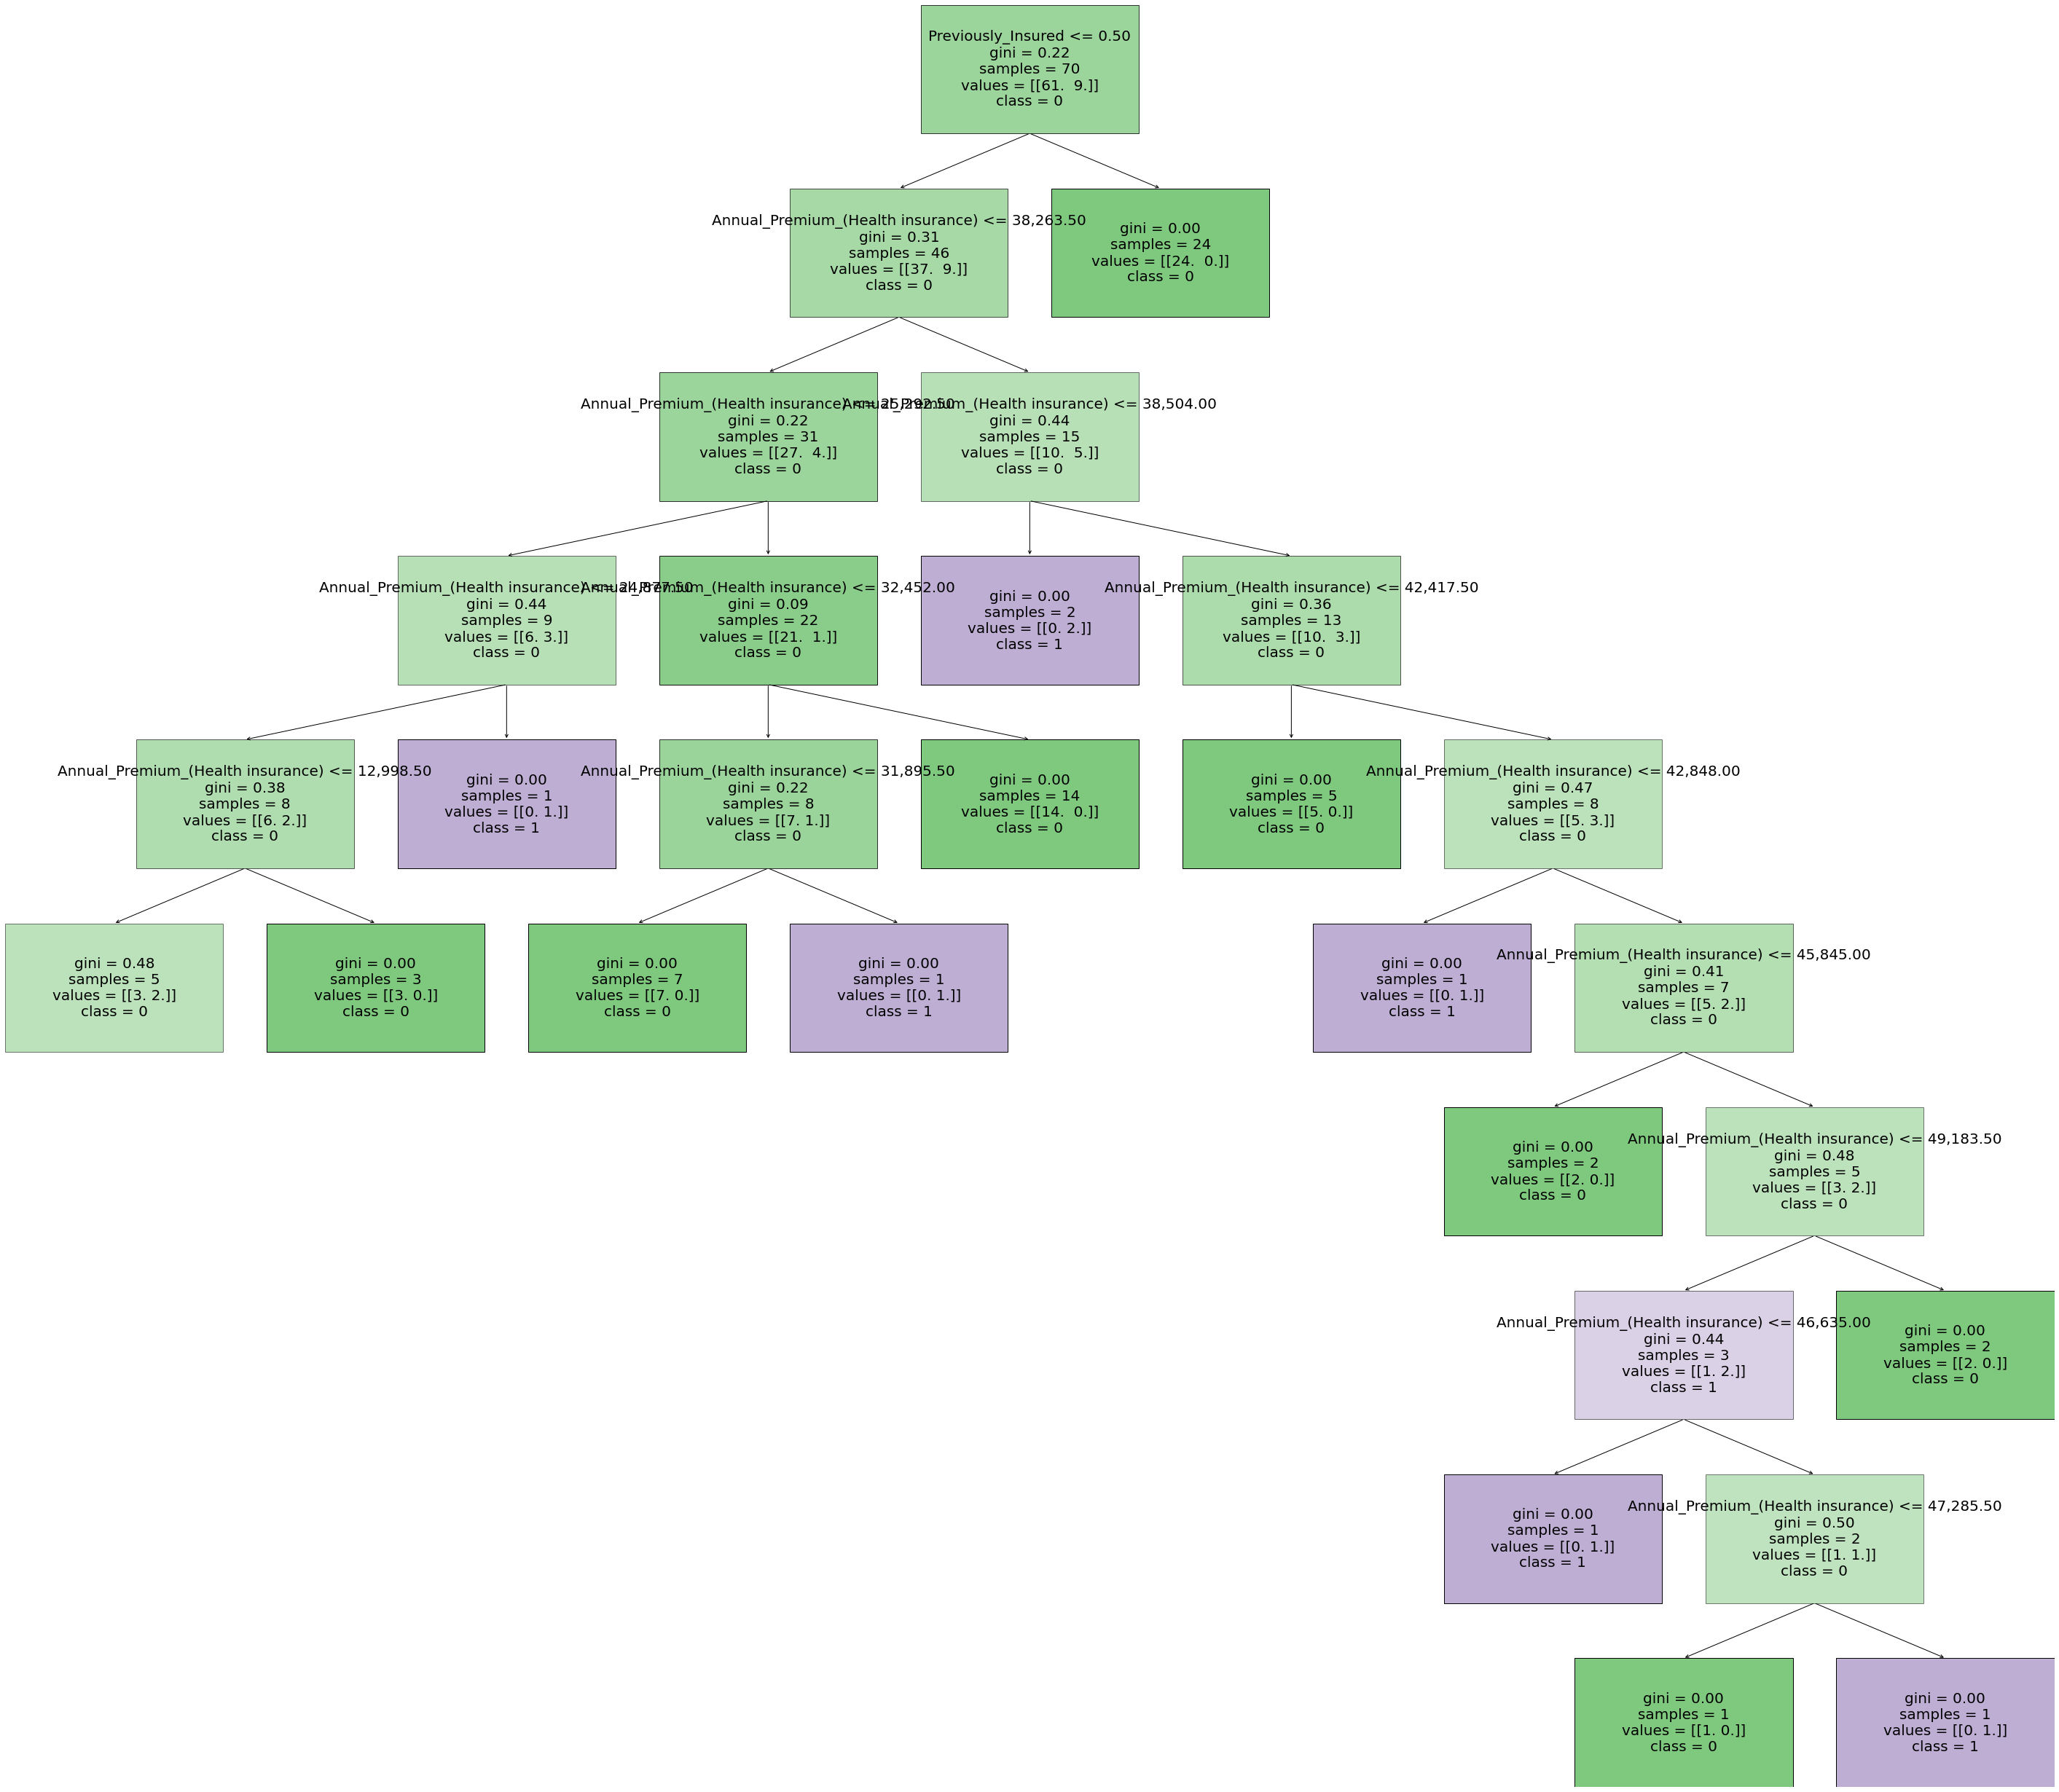

In [45]:
dtree = dtreeplt( model=dt, feature_names=X1_train.columns, target_names=['0','1'] ) 
fig = dtree.view() 
fig.savefig('output.png')
